In [ ]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import numpy as np

# create an instance of the logger
logger = logging.getLogger()

# Change current directory to parent directory
import os
os.chdir("..")

## Power Curve: Average Wind Speed Vs. Average Power

In [7]:
# Define global variables
RAW_PATH_SCADA = 'data/raw/scada.csv'

# Check if the file exists
if os.path.exists(RAW_PATH_SCADA):
    # Load the file
    scada_data = pd.read_csv(RAW_PATH_SCADA)
    print(scada_data.head())
else:
    print("File not found:", RAW_PATH_SCADA)

        DateTime        Time  Error  WEC: ava. windspeed  WEC: max. windspeed  \
0  5/1/2014 0:00  1398920448      0                  6.9                  9.4   
1  5/1/2014 0:09  1398920960      0                  5.3                  8.9   
2  5/1/2014 0:20  1398921600      0                  5.0                  9.5   
3  5/1/2014 0:30  1398922240      0                  4.4                  8.3   
4  5/1/2014 0:39  1398922752      0                  5.7                  9.7   

   WEC: min. windspeed  WEC: ava. Rotation  WEC: max. Rotation  \
0                  2.9                 0.0                0.02   
1                  1.6                 0.0                0.01   
2                  1.4                 0.0                0.04   
3                  1.3                 0.0                0.08   
4                  1.2                 0.0                0.05   

   WEC: min. Rotation  WEC: ava. Power  ...  Rectifier cabinet temp.  \
0                 0.0                0  ... 

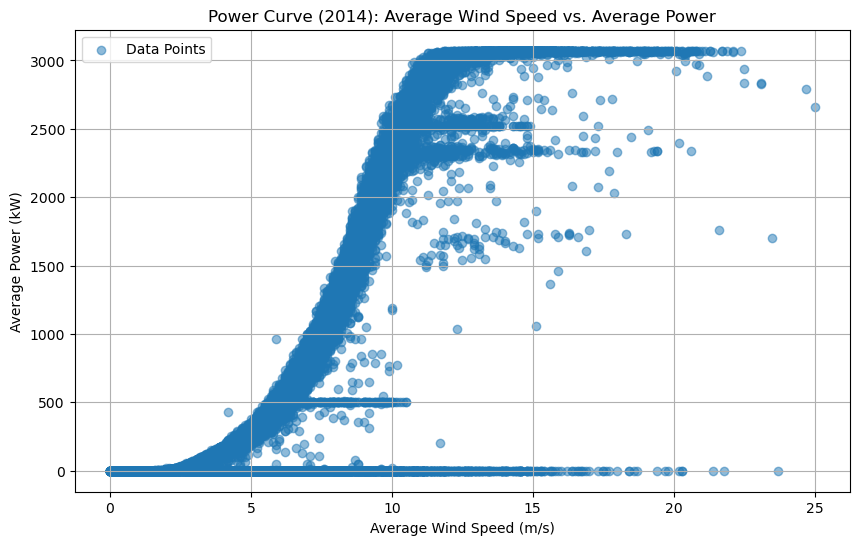

In [14]:
# Filter the merged dataset to include only data from the year 2014
scada_data_2014 = scada_data[scada_data['DateTime'].dt.year == 2014]

# Extracting relevant columns for the power curve
x_windspeed = scada_data_2014['WEC: ava. windspeed']
y_power = scada_data_2014['WEC: ava. Power']

# Plotting the power curve
plt.figure(figsize=(10, 6))
plt.scatter(x_windspeed, y_power, alpha=0.5, label="Data Points")
plt.title('Power Curve (2014): Average Wind Speed vs. Average Power')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Average Power (kW)')
plt.grid(True)
plt.legend()
plt.show()


The power curve plot showing the relationship between average wind speed (x-axis) and average power (y-axis)

## Power Curve Comparison: With And Without Faults in the Year 2014

In [8]:
# Define global variables
RAW_PATH_FAULT = 'data/raw/fault.csv'

# Check if the file exists
if os.path.exists(RAW_PATH_FAULT):
    # Load the file
    fault_data = pd.read_csv(RAW_PATH_FAULT)
    print(fault_data.head())
else:
    print("File not found:", RAW_PATH_FAULT)

              DateTime          Time Fault
0  2014-05-14 14:39:44  1.400096e+09    GF
1  2014-05-14 14:50:24  1.400097e+09    GF
2  2014-05-14 14:58:56  1.400098e+09    GF
3  2014-05-14 15:09:36  1.400098e+09    GF
4  2014-05-14 15:20:16  1.400099e+09    GF


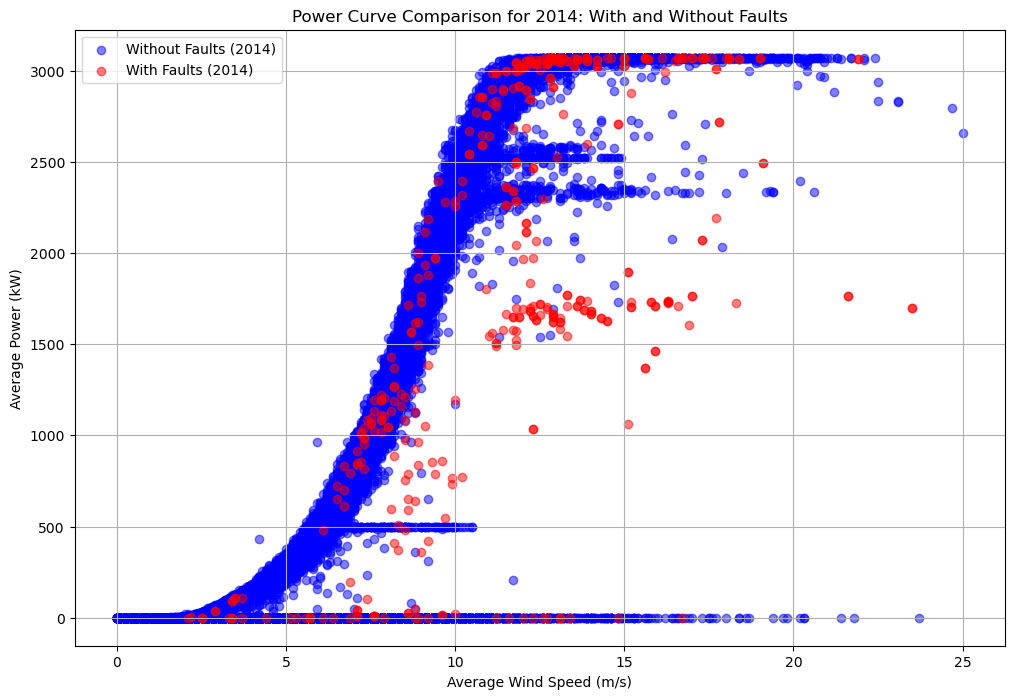

In [12]:
# Standardize the DateTime format for both datasets to ensure consistency
fault_data['DateTime'] = pd.to_datetime(fault_data['DateTime']).dt.floor('T')  # Truncate to nearest minute
scada_data['DateTime'] = pd.to_datetime(scada_data['DateTime']).dt.floor('T')

# Merge the datasets on the standardized DateTime (date, time, and minute) using a full outer join
merged_data = pd.merge(scada_data, fault_data, on='DateTime', how='outer')

# Add a column indicating whether a fault is present
merged_data['Fault_Present'] = merged_data['Fault'].notna()

# Filter the merged dataset to include only data from the year 2014
merged_data_2014 = merged_data[merged_data['DateTime'].dt.year == 2014]

# Separate datasets with and without faults for 2014
data_with_faults_2014 = merged_data_2014[merged_data_2014['Fault_Present']]
data_without_faults_2014 = merged_data_2014[~merged_data_2014['Fault_Present']]

# Extract relevant columns for plotting
x_windspeed_with_faults_2014 = data_with_faults_2014['WEC: ava. windspeed']
y_power_with_faults_2014 = data_with_faults_2014['WEC: ava. Power']

x_windspeed_without_faults_2014 = data_without_faults_2014['WEC: ava. windspeed']
y_power_without_faults_2014 = data_without_faults_2014['WEC: ava. Power']

# Plot the power curves for 2014
plt.figure(figsize=(12, 8))
plt.scatter(x_windspeed_without_faults_2014, y_power_without_faults_2014, alpha=0.5, color='blue', label='Without Faults (2014)')
plt.scatter(x_windspeed_with_faults_2014, y_power_with_faults_2014, alpha=0.5, color='red', label='With Faults (2014)')
plt.title('Power Curve Comparison for 2014: With and Without Faults')
plt.xlabel('Average Wind Speed (m/s)')
plt.ylabel('Average Power (kW)')
plt.grid(True)
plt.legend()
plt.show()

### Analysis of the Power Curve Comparison (2014)

The graph compares the power curves for 2014, distinguishing between data points where faults are present (**red points**) and where they are absent (**blue points**).

#### Observations:
1. **Without Faults (Blue Points)**:
   - The power curve exhibits a standard trend, where power output increases with wind speed up to a certain limit, consistent with typical wind turbine behavior.
   - At low wind speeds (below ~5 m/s), power generation is negligible.
   - The power stabilizes at a maximum (plateau) beyond a specific wind speed, likely due to turbine design limitations or cut-off thresholds.

2. **With Faults (Red Points)**:
   - The data with faults displays scattered patterns, deviating from the standard power curve.
   - Significant inconsistencies are observed in power generation at moderate wind speeds (~5-15 m/s). This suggests that faults hinder the turbine's efficiency and disrupt normal power generation.
   - Some data points indicate low or zero power even at wind speeds where turbines are expected to operate efficiently. This could be due to the turbine shutting down or operating under reduced capacity due to faults.

3. **Comparison**:
   - The blue points form a smooth curve, while the red points are more scattered, indicating the disruptive impact of faults on turbine performance.
   - At high wind speeds (>15 m/s), the red points show more erratic behavior compared to the plateau observed in the blue points. This suggests faults may prevent the turbine from safely reaching its maximum power output.

**Conclusion**
  - Faults can cause the turbine to operate below its optimal efficiency, leading to reduced or unstable power output.
  - Faults might trigger safety protocols, causing the turbine to stop or reduce power output under certain conditions.